In [3]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/ML"

Alakazam  Hypno


In [6]:
p = Path("/content/drive/My Drive/ML")

dirs = p.glob("*")

print(dirs)

image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Alakazam":0,"Hypno":1}
label2pokemon = {0:"Alakazam",1:"Hypno"}

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    print(label)
    
    cnt = 0
   # print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        print(img_path)
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

<generator object Path.glob at 0x7fe51d2cf9e8>
Alakazam
/content/drive/My Drive/ML/Alakazam/0bdefe16e8734bf0a8653ec64123ffe9.jpg
/content/drive/My Drive/ML/Alakazam/0d40cd9bfaa04804a2ef675010c06832.jpg
/content/drive/My Drive/ML/Alakazam/0cfe57a5bf674650b0de0c381df13ca0.jpg
/content/drive/My Drive/ML/Alakazam/291f16377a994c5cb0fc654db9568a0e.jpg
/content/drive/My Drive/ML/Alakazam/30bb8818f4574e319d59835d98dc5959.jpg
/content/drive/My Drive/ML/Alakazam/0f957c10591a4acebdedc5e651606239.jpg
/content/drive/My Drive/ML/Alakazam/19e3ed99fae14c04af32a8d2f31d50cd.jpg
/content/drive/My Drive/ML/Alakazam/23bf91dbb0c043db80b76cb6243153b2.jpg
/content/drive/My Drive/ML/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4.jpg
/content/drive/My Drive/ML/Alakazam/36a7787e151c454f9930925eb44d5514.jpg
/content/drive/My Drive/ML/Alakazam/36dccc6cf19842a0a81f84d876f88cc2.jpg
/content/drive/My Drive/ML/Alakazam/4a96fd6448eb4714a3aa363cae320510.jpg
/content/drive/My Drive/ML/Alakazam/5f696c035e35464b80243bb0e34be6df

In [0]:
import numpy as np

In [8]:
print(len(image_data))

39


In [0]:
X=np.array(image_data)
Y=np.array(labels)

In [10]:
print(X.shape)
print(Y.shape)
print(Y)

(39, 40, 40, 3)
(39,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [0]:
#draw some pokemons

def drawing(img,label):
  plt.title(label2pokemon[label])
  plt.imshow(img)
  plt.show()

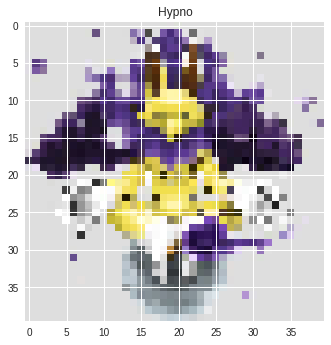

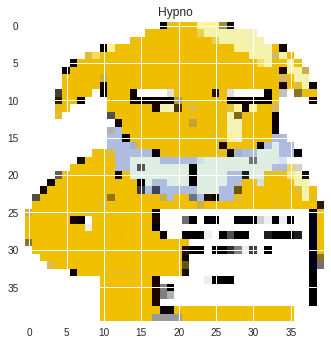

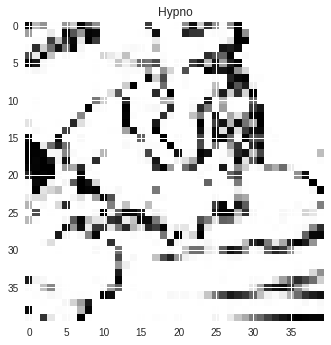

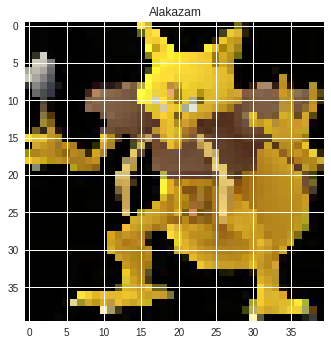

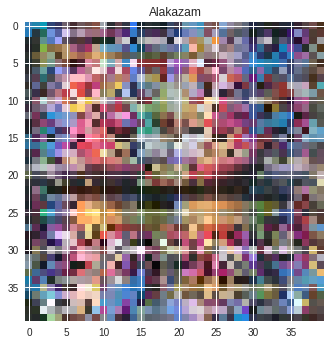

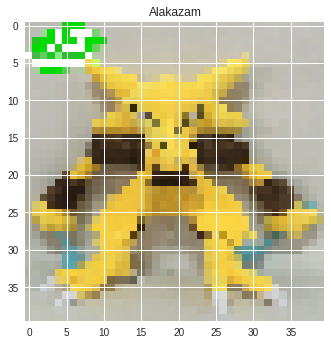

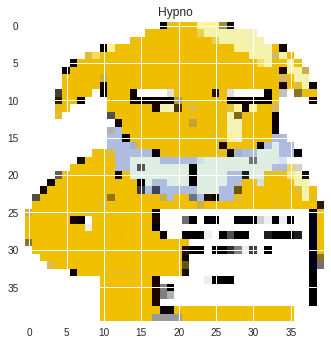

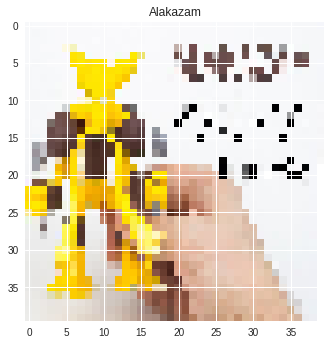

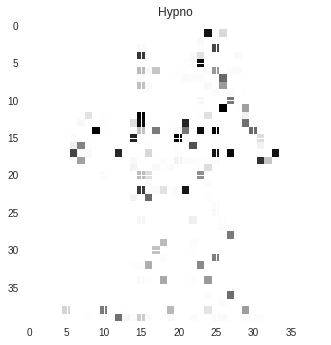

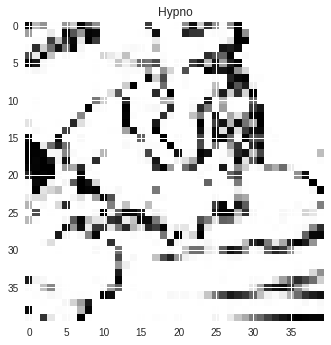

In [12]:
for i in range(10):
  r=np.random.randint(39)
  
  drawing(X[r]/255,Y[r])

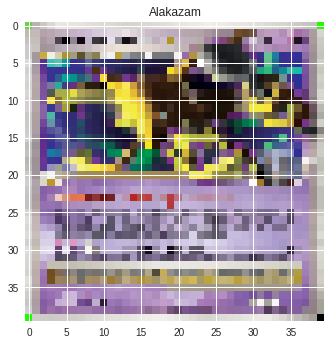

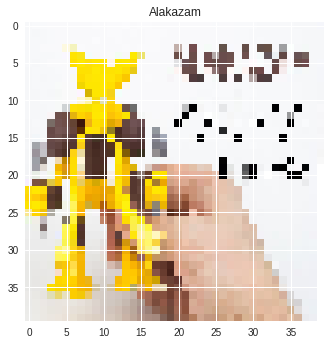

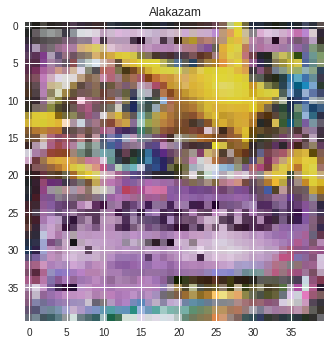

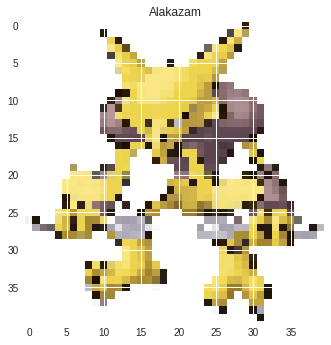

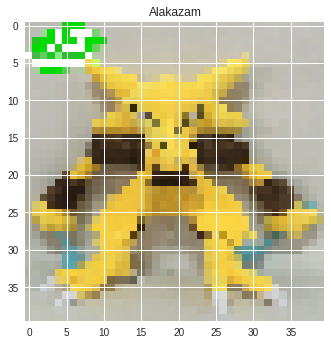

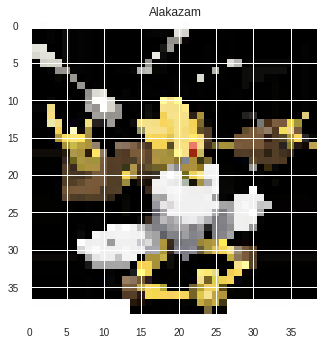

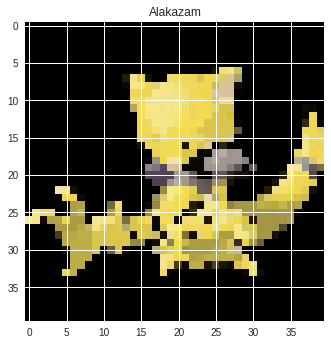

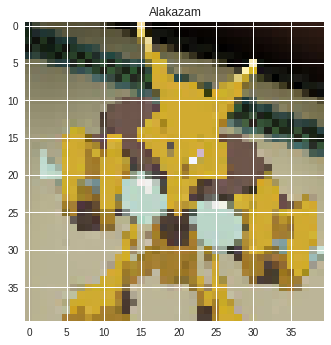

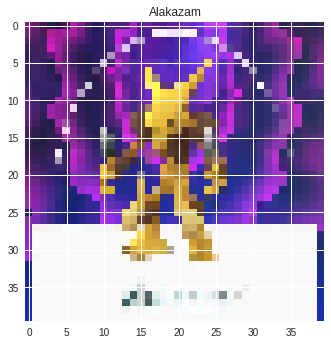

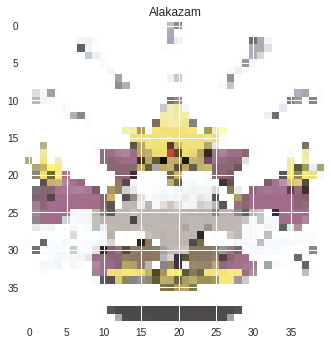

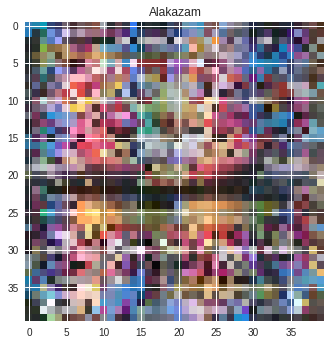

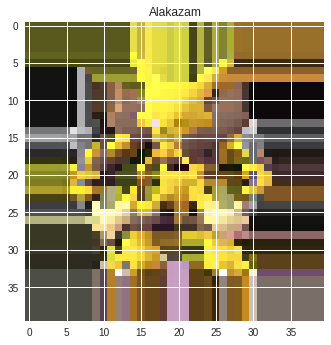

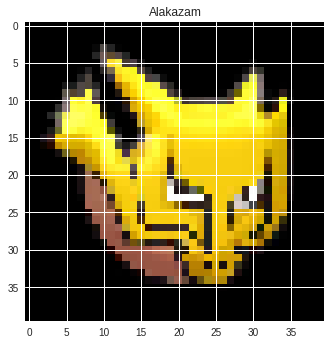

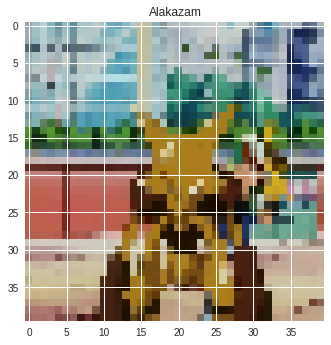

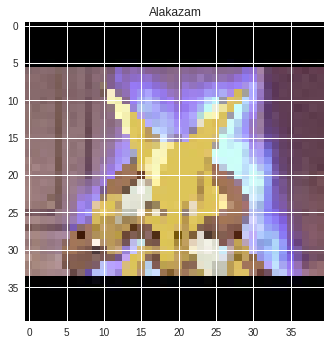

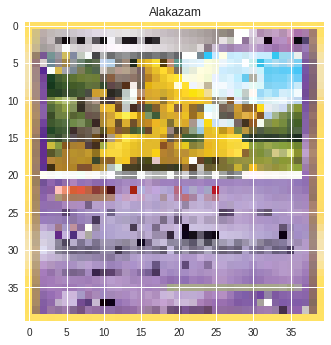

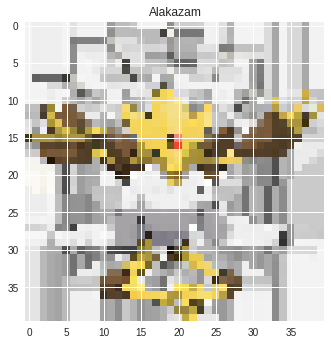

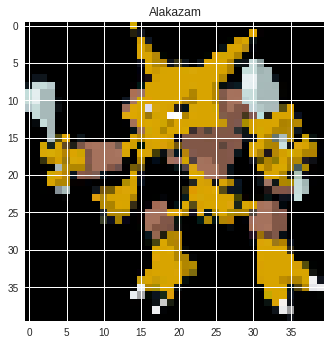

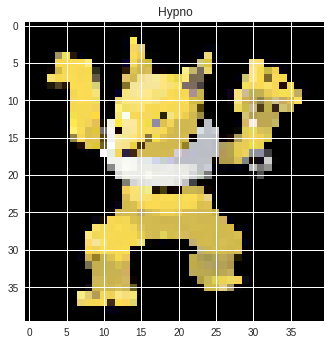

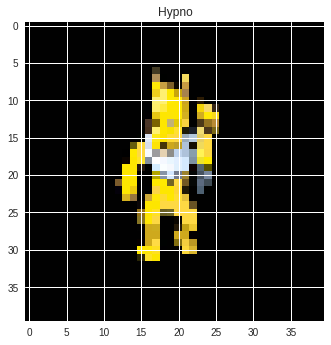

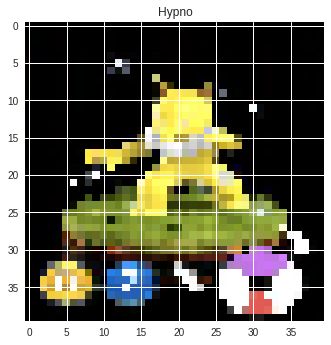

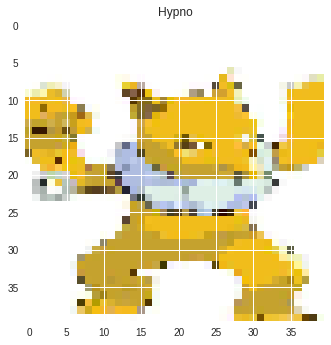

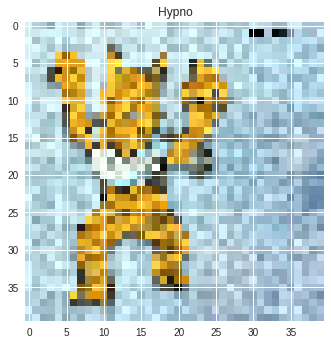

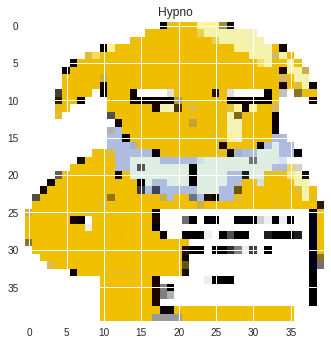

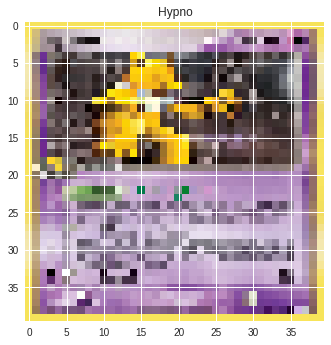

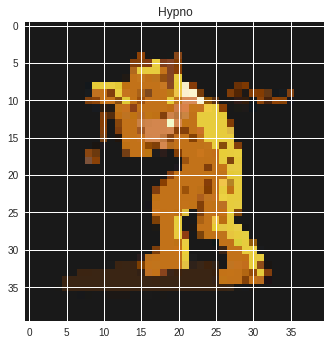

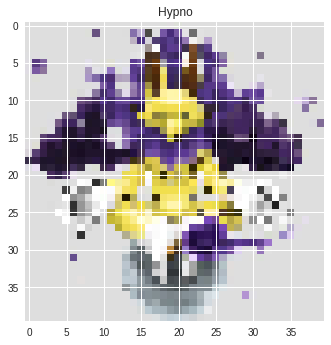

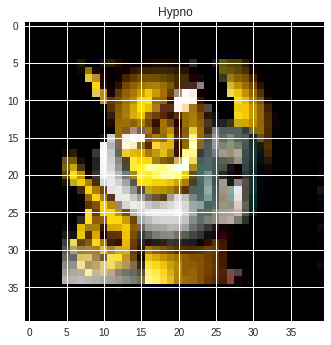

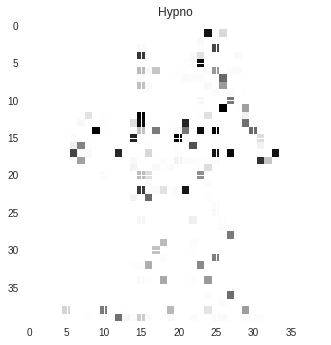

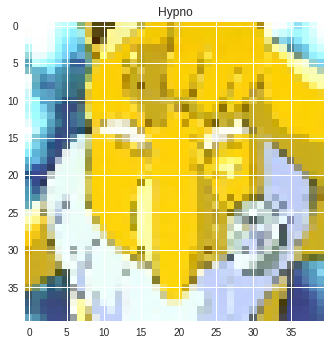

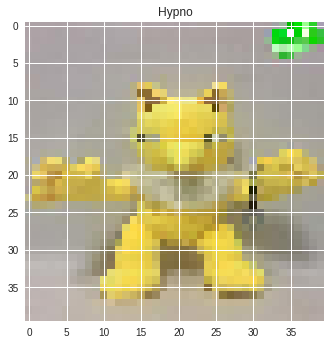

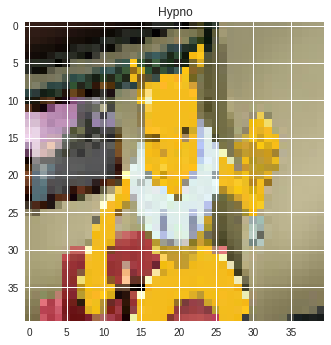

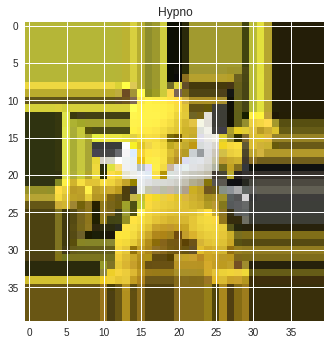

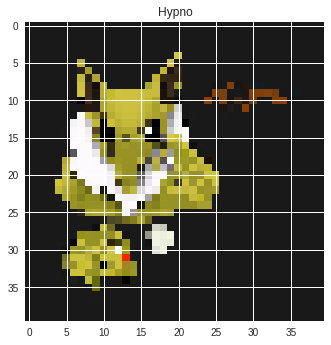

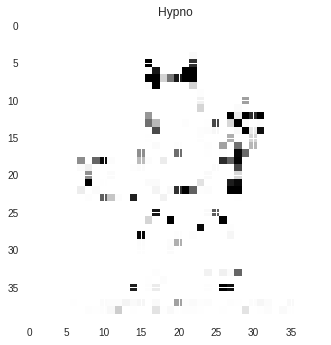

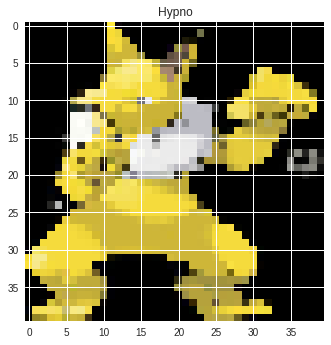

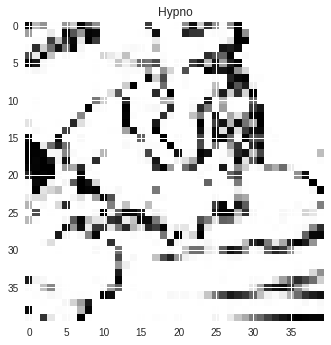

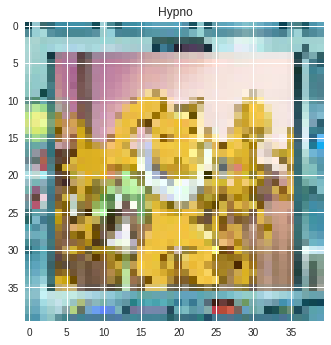

In [13]:
for i in range(1,39):
  drawing(X[i].reshape(40,40,3)/255,Y[i])

In [0]:
split=int(X.shape[0]*0.8)

In [0]:
X_=np.array(X)
Y_=np.array(Y)

In [19]:
X_train=X_[:split]
Y_train=Y_[:split]

X_test=X_[split:]
Y_test=Y_[split:]

print(X_test.shape)
print(X_train.shape)

(8, 40, 40, 3)
(31, 40, 40, 3)


In [0]:
import random
random.seed(10)

In [22]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)

(39, 4800)
(8, 4800)


In [0]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [0]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht


In [0]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [0]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=2) #4800 features(40X40X3)


In [35]:
l = train(X,Y,model,500,0.0002)


Epoch 0 Loss 1.7354
Epoch 50 Loss 0.8892
Epoch 100 Loss 0.4360
Epoch 150 Loss 0.2249
Epoch 200 Loss 0.1511
Epoch 250 Loss 0.1140
Epoch 300 Loss 0.0631
Epoch 350 Loss 0.0394
Epoch 400 Loss 0.0293
Epoch 450 Loss 0.0231


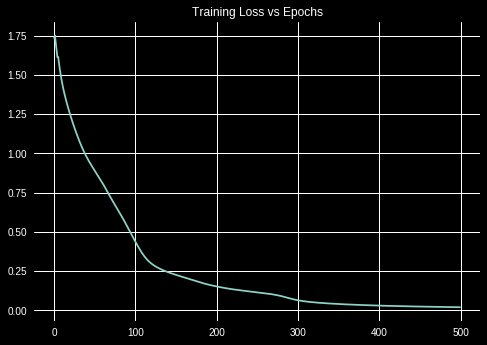

In [36]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [38]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(X_test,Y_test,model))

Train Acc 1.0000
Test Acc 1.0000
